In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import similaritymeasures as sm

In [2]:
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_csv('traks.csv', sep=';').sort_values('time')
data

,track,time,x,y
0,1,10:32:13,1598,526
1,1,10:32:14,1524,544
2,1,10:32:15,1441,557
3,1,10:32:16,1357,392
4,1,10:32:17,1395,573
...,...,...,...,...
109,4,10:42:09,432,689
110,4,10:42:10,450,736
111,4,10:42:11,503,754
112,4,10:42:12,1620,924


In [4]:
c = {}
for i in range(1,5):
    c[i] = data[data['track'] == i][['x','y']]

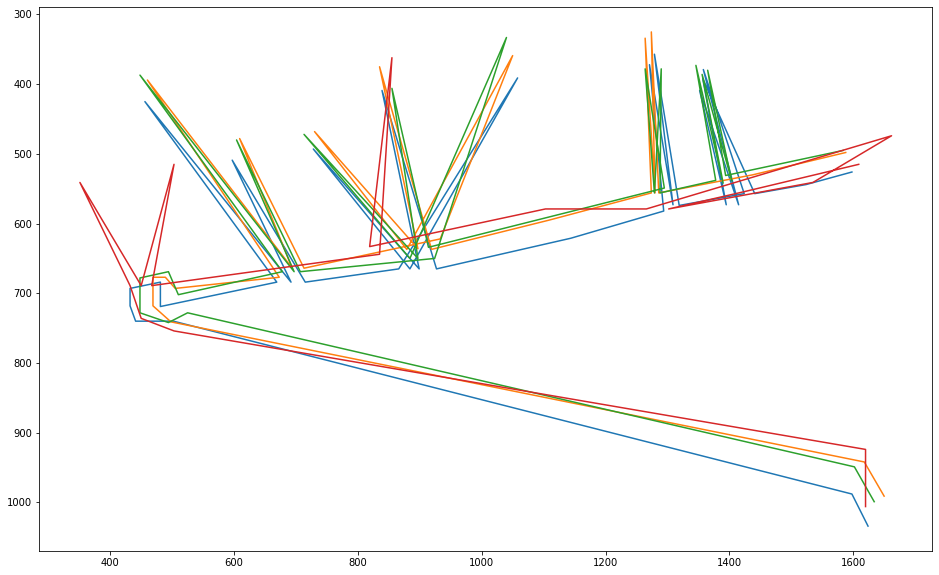

In [5]:
plt.subplots(figsize=(16, 10))
for i in range(1,5):
    plt.plot('x','y',data=c[i])
plt.gca().invert_yaxis()

Траектории очень похожи друг на друга, шума нет. Для определения совпадения/различия подойдёт Dynamic Time Warping.<p>
Поскольку метрика зависит от количества аргументов, результат поделим на корень из произведения их количества.

In [6]:
for num in c:
    print(len(c[num]))

35
27
33
19


Число точек разное.

In [7]:
def check_traj(c1,c2):
    return sm.dtw(c1,c2)[0] / ( (len(c1) * len(c2)) ** 0.5 )

In [8]:
print(f'Траектории 3 и 1: значение', check_traj(c[3],c[1]))

Траектории 3 и 1: значение 35.54746795925508


In [9]:
print(f'Траектории 2: и 1 значение', check_traj(c[2],c[1]))

Траектории 2: и 1 значение 52.32311020871921


In [10]:
for i in range(1,4):
    print(f'Траектории 4: и {i} значение', check_traj(c[4],c[i]))

Траектории 4: и 1 значение 145.180264472791
Траектории 4: и 2 значение 143.10092691184954
Траектории 4: и 3 значение 156.34948968722358
